<a href="https://colab.research.google.com/github/TitinFadila/Deep_learning/blob/main/monkey_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/monkeyspacies

In [91]:
cp /content/drive/MyDrive/deeplearning/deeplearning.zip /content/monkeyspacies

cp: cannot stat '/content/drive/MyDrive/deeplearning/deeplearning.zip': No such file or directory


In [90]:
!unzip /content/drive/MyDrive/monkeyspecies/archive.zip -d /content/monkeyspacies

Archive:  /content/drive/MyDrive/monkeyspecies/archive.zip
replace /content/monkeyspacies/monkey_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [92]:
import math                      
import matplotlib.pyplot as plt  
import scipy                    
import cv2                       
import numpy as np               
import glob                      
import os                       
import pandas as pd              
import tensorflow as tf       
import itertools
import random
from random import shuffle       
from tqdm import tqdm           
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)

In [93]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [94]:
train_dir = Path('/content/monkeyspacies/training')
test_dir = Path('/content/monkeyspacies/validation')

In [95]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("/content/monkeyspacies/monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [96]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [97]:
def image_show(num_image,label):
    for i in range(num_image):
        imgdir = Path('/content/monkeyspacies/training/training/' + label)
        imgfile = random.choice(os.listdir(imgdir))
        img = cv2.imread('/content/monkeyspacies/training/training/'+ label +'/'+ imgfile)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

 pygmy_marmoset                


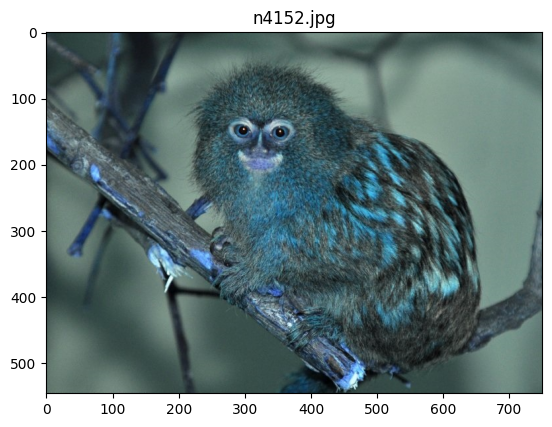

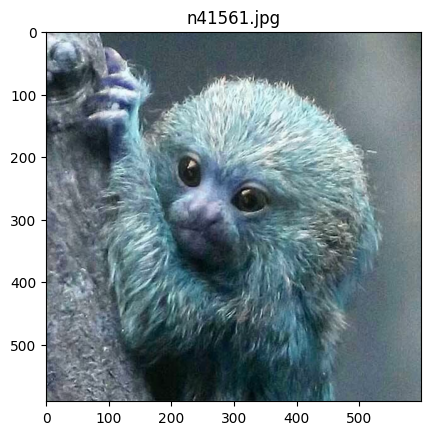

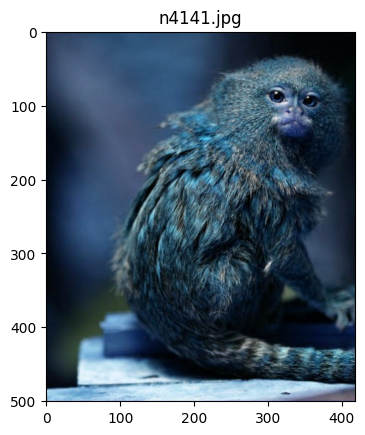

In [98]:
print(labels[4])
image_show(3,'n4')

In [99]:
LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 64
num_classes = 10
epochs = 200
data_augmentation = True
num_predictions = 20

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples 

Found 1098 images belonging to 1 classes.
Found 272 images belonging to 1 classes.


In [100]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [101]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_24 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

In [102]:
filepath=str(os.getcwd()+"/model.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [103]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=5,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             ) 

<ipython-input-103-1fc53a40e80f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 6594.3594 - acc: 0.0667
Epoch 1: val_acc improved from -inf to 0.00000, saving model to /content/model.h5f


17/17 [==============================] - 113s 6s/step - loss: 6594.3594 - acc: 0.0667 - val_loss: 24672.7480 - val_acc: 0.0000e+00
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1029720.3125 - acc: 0.0571
Epoch 2: val_acc did not improve from 0.00000
17/17 [==============================] - 95s 5s/step - loss: 1029720.3125 - acc: 0.0571 - val_loss: 2281651.5000 - val_acc: 0.0000e+00
Epoch 3/5
17/17 [==============================] - ETA: 0s - loss: 26580720.0000 - acc: 0.0590
Epoch 3: val_acc did not improve from 0.00000
17/17 [==============================] - 104s 6s/step - loss: 26580720.0000 - acc: 0.0590 - val_loss: 42412048.0000 - val_acc: 0.0000e+00
Epoch 4/5
17/17 [==============================] - ETA: 0s - loss: 307862080.0000 - acc: 0.0716
Epoch 4: val_acc did not improve from 0.00000
17/17 [==============================] - 99s 6s/step - loss: 307862080.0000 - acc: 0.0716 - val_loss: 367744320.0000 - val_acc: 0.0000e+00
Epoch 5/5
17/17 [=================

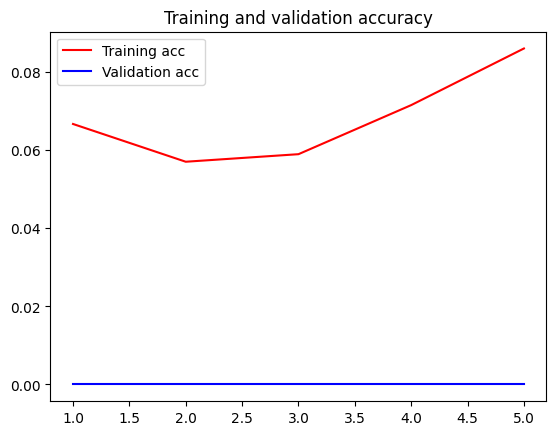

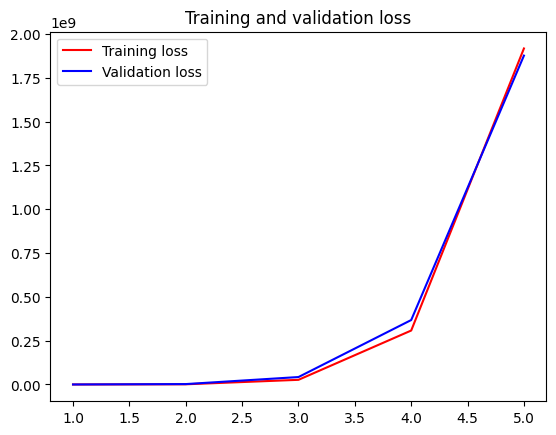

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [106]:
def plot_confusion_matrix(cm, target_names,title='Confusion matrix',cmap=None,normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)
        cm = np.round(cm,2)
        

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label\naccuracy={:0.4f}\n misclass={:0.4f}".format(accuracy, misclass))
    plt.show()

<ipython-input-107-a02545db9c61>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_trained.predict_generator(validation_generator, validation_num // batch_size+1)
<ipython-input-106-a3a93c7316bf>:17: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm.astype('float32') / cm.sum(axis=1)
<ipython-input-106-a3a93c7316bf>:17: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float32') / cm.sum(axis=1)


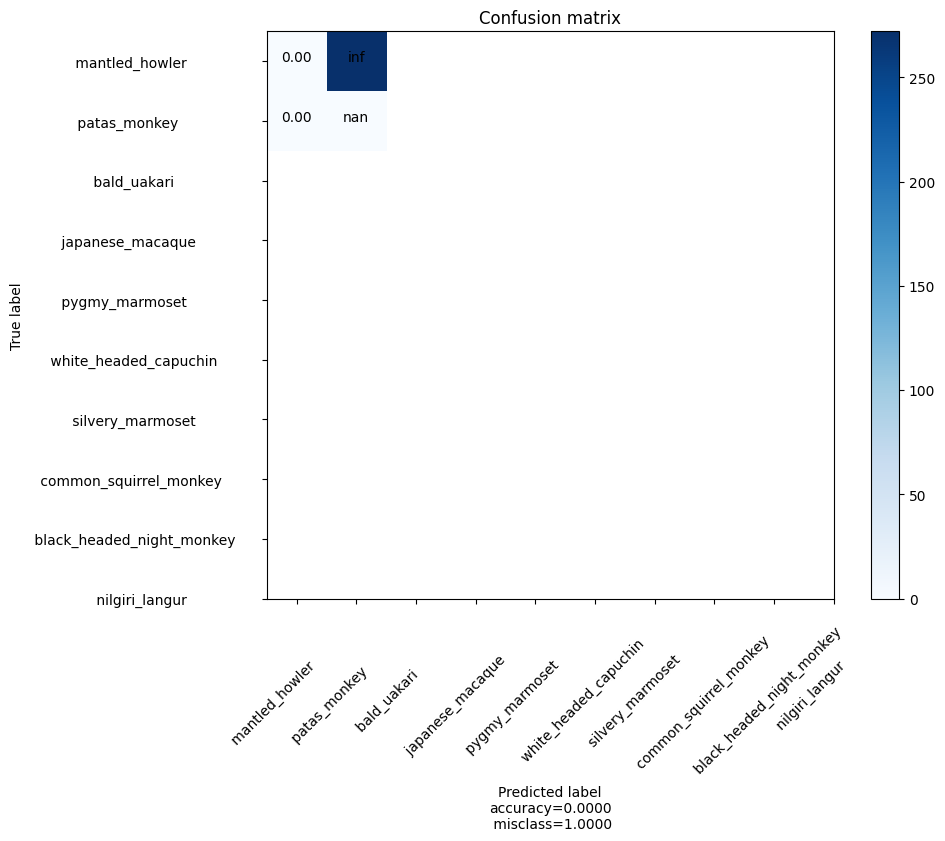

In [107]:


from keras.models import load_model
model_trained = load_model(filepath)
Y_pred = model_trained.predict_generator(validation_generator, validation_num // batch_size+1)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)
plot_confusion_matrix(confusion_mtx, normalize=True, target_names=labels)
     


In [108]:
print(metrics.classification_report(validation_generator.classes, Y_pred_classes,target_names=labels))

ValueError: ignored

In [109]:
test_list = os.listdir("../input/test-monkeys/")
test_list.sort()
print(test_list)
model_test = load_model(filepath)

FileNotFoundError: ignored